## RF with 3 categories: No matter, NS but no Remnant, NS and a remnant

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.0.


In [2]:
import classyRF_final as classyRF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import importlib
importlib.reload(classyRF_final) 

In [33]:
pathData = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\allEOS\\"
pathClassy = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\FINAL\\"
pathForest = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\FINAL\\SushantForest_2\\"

In [36]:
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]
BayesFactor=[1.526, 1.555, 0.056, 1.422, 1.177, 1.283, 0.276, 0.001, 0.009, 0.176, 0.179, 0.159, 0.108, 0.107, 0.33, 0.025, 0.288, 0.29, 0.618, 1.0, 1.028, 0.37, 0.932]
EOSTest = ["APR4_EPP", "BHF_BBB2"]
EOScolor = ['BHF_BBB2', 'SLy', 'MS1B_PP']

In [5]:
i_m1r=1; i_m2r=2; i_x1r=3; i_x2r=4; i_snr=8;
recovered=[i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

### Load the data and convert to the three categories

In [34]:
EOSdic = {}
count = 0
for eos in EOS:
    RF = classyRF.ClassificationRF()
    RF.loadPickle(pathForest+'random_forest_'+eos)
    RF.load_test_dataset(pathData+eos+'\\EMB\\', 'test_EMB_ID_LABEL_'+eos+'_s300_f0d7.csv')
    aux = RF.labels_test
    RF.load_test_dataset(pathData+eos+'\\NS\\', 'test_NS_ID_LABEL_'+eos+'_s300_f0d7.csv')
    RF.labels_test = RF.labels_test + aux
    RF.subset_test(recovered)
    new_dic = {}
    new_dic['forest'] = RF
    new_dic['weight'] = BayesFactor[count]
    EOSdic[eos] = new_dic
    count = count + 1 



## Histograms (fig5)

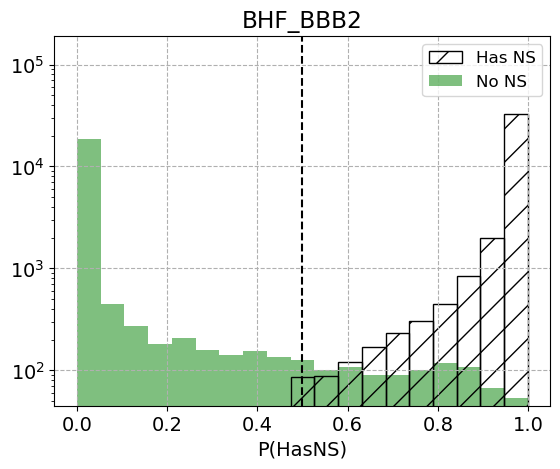

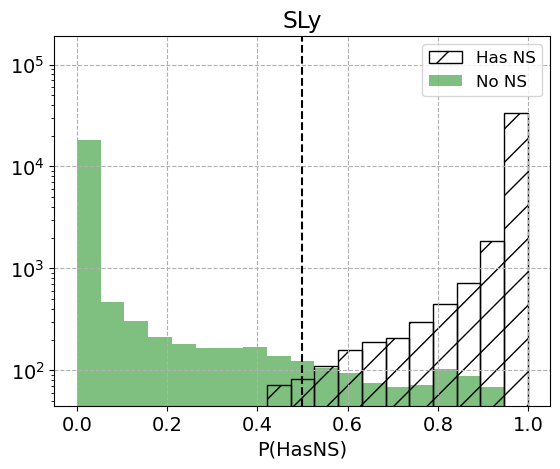

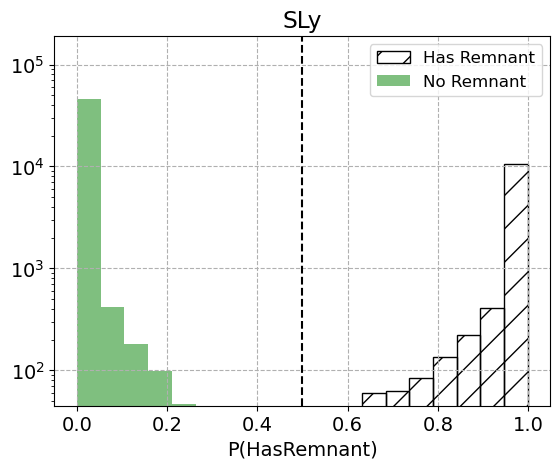

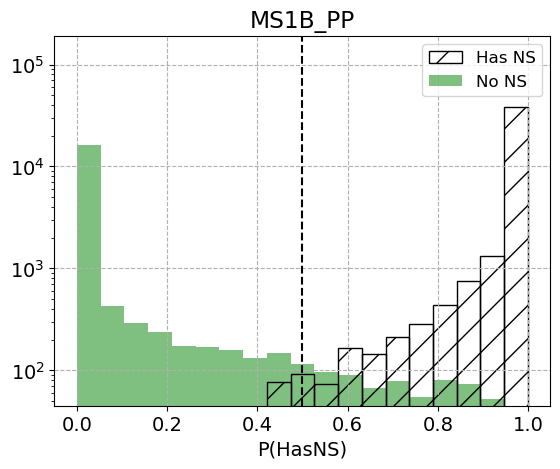

In [37]:
for eos in EOScolor:
    EOSdic[eos]['forest'].save_plots=True
    EOSdic[eos]['NS_nohas'], EOSdic[eos]['NS_has'], EOSdic[eos]['bins'] = EOSdic[eos]['forest'].hist_NS(eos, eos+'_NShist')
    EOSdic[eos]['REM_nohas'], EOSdic[eos]['REM_has'], EOSdic[eos]['bins'] = EOSdic[eos]['forest'].hist_REM(eos,eos+'_REMhist')

In [45]:
plt.rcParams["font.size"]=12
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
eoscolumn1 = 'BHF_BBB2';  eoscolumn2 = 'SLy';  eoscolumn3 = 'MS1B_PP'
order = [1,0]

ax[0,0].hist(EOSdic[eoscolumn1]['NS_nohas'], bins=np.linspace(0,1,20), color='green', alpha=0.5, label='No NS')
ax[0,0].hist(EOSdic[eoscolumn1]['NS_has'], bins=np.linspace(0,1,20), color=(0.1, 0.2, 0.5, 0.), 
             edgecolor='black', hatch="/", label='Has NS')
ax[0,0].set_xticks([0,0.2,0.4,0.6,0.8,1])
ax[0,0].set_yticks([1e2,1e3,1e4,1e5])
ax[0,0].set_yscale('log')
ax[0,0].set_ylim([4.5e1,1.9e5])
ax[0,0].set_title(eoscolumn1)
ax[0,0].axvline(x=0.5,color='black',ls='--')
ax[0,0].set_xlabel('P(HasNS)')
ax[0,0].grid(ls='--')
handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)   
    
ax[0,1].hist(EOSdic[eoscolumn2]['NS_nohas'], bins=np.linspace(0,1,20), color='green', alpha=0.5, label='No NS')
ax[0,1].hist(EOSdic[eoscolumn2]['NS_has'], bins=np.linspace(0,1,20), color=(0.1, 0.2, 0.5, 0.), 
             edgecolor='black', hatch="/", label='Has NS')
ax[0,1].set_xticks([0,0.2,0.4,0.6,0.8,1])
ax[0,1].set_yticks([1e2,1e3,1e4,1e5])
ax[0,1].set_yscale('log')
ax[0,1].set_ylim([4.5e1,1.9e5])
ax[0,1].set_title(eoscolumn2)
ax[0,1].axvline(x=0.5,color='black',ls='--')
ax[0,1].set_xlabel('P(HasNS)')
ax[0,1].grid(ls='--')
handles, labels = ax[0,1].get_legend_handles_labels()
ax[0,1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)  

ax[0,2].hist(EOSdic[eoscolumn3]['NS_nohas'], bins=np.linspace(0,1,20), color='green', alpha=0.5, label='No NS')
ax[0,2].hist(EOSdic[eoscolumn3]['NS_has'], bins=np.linspace(0,1,20), color=(0.1, 0.2, 0.5, 0.), 
             edgecolor='black', hatch="/", label='Has NS')
ax[0,2].set_xticks([0,0.2,0.4,0.6,0.8,1])
ax[0,2].set_yticks([1e2,1e3,1e4,1e5])
ax[0,2].set_yscale('log')
ax[0,2].set_ylim([4.5e1,1.9e5])
ax[0,2].set_title(eoscolumn3)
ax[0,2].axvline(x=0.5,color='black',ls='--')
ax[0,2].set_xlabel('P(HasNS)')
ax[0,2].grid(ls='--')
handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,2].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)  


ax[1,0].hist(EOSdic[eoscolumn1]['REM_nohas'], bins=np.linspace(0,1,20), color='green', alpha=0.5, label='No Remnant')
ax[1,0].hist(EOSdic[eoscolumn1]['REM_has'], bins=np.linspace(0,1,20), color=(0.1, 0.2, 0.5, 0.), 
             edgecolor='black', hatch="/", label='Has Remnant')
ax[1,0].set_xticks([0,0.2,0.4,0.6,0.8,1])
ax[1,0].set_yticks([1e2,1e3,1e4,1e5])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim([4.5e1,1.9e5])
ax[1,0].set_title(eoscolumn1)
ax[1,0].axvline(x=0.5,color='black',ls='--')
ax[1,0].set_xlabel('P(HasRemnant)')
ax[1,0].grid(ls='--')
handles, labels = ax[0,0].get_legend_handles_labels()
ax[1,0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)   
    
ax[1,1].hist(EOSdic[eoscolumn2]['REM_nohas'], bins=np.linspace(0,1,20), color='green', alpha=0.5, label='No Remnant')
ax[1,1].hist(EOSdic[eoscolumn2]['REM_has'], bins=np.linspace(0,1,20), color=(0.1, 0.2, 0.5, 0.), 
             edgecolor='black', hatch="/", label='Has Remnant')
ax[1,1].set_xticks([0,0.2,0.4,0.6,0.8,1])
ax[1,1].set_yticks([1e2,1e3,1e4,1e5])
ax[1,1].set_yscale('log')
ax[1,1].set_ylim([4.5e1,1.9e5])
ax[1,1].set_title(eoscolumn2)
ax[1,1].axvline(x=0.5,color='black',ls='--')
ax[1,1].set_xlabel('P(HasRemnant)')
ax[1,1].grid(ls='--')
handles, labels = ax[0,1].get_legend_handles_labels()
ax[1,1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)  

ax[1,2].hist(EOSdic[eoscolumn3]['REM_nohas'], bins=np.linspace(0,1,20), color='green', alpha=0.5, label='No Remnant')
ax[1,2].hist(EOSdic[eoscolumn3]['REM_has'], bins=np.linspace(0,1,20), color=(0.1, 0.2, 0.5, 0.), 
             edgecolor='black', hatch="/", label='Has Remnant')
ax[1,2].set_xticks([0,0.2,0.4,0.6,0.8,1])
ax[1,2].set_yticks([1e2,1e3,1e4,1e5])
ax[1,2].set_yscale('log')
ax[1,2].set_ylim([4.5e1,1.9e5])
ax[1,2].set_title(eoscolumn3)
ax[1,2].axvline(x=0.5,color='black',ls='--')
ax[1,2].set_xlabel('P(HasRemnant)')
ax[1,2].grid(ls='--')
handles, labels = ax[0,0].get_legend_handles_labels()
ax[1,2].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)  

fig.tight_layout()
plt.show()

In [ ]:
subplot(2,3)

ns1 ns2 ns3
rem1 rem2 rem3

## ROC curve (fig5)

--------------------- APR4_EPP ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.106
Threshold  0.3 TP: 0.997, FP 0.062
Threshold  0.5 TP: 0.993, FP 0.039
Threshold  0.8 TP: 0.964, FP 0.013


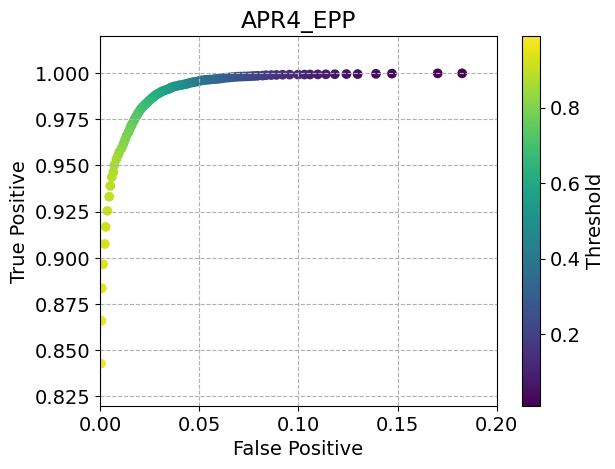

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.012
Threshold  0.3 TP: 0.995, FP 0.004
Threshold  0.5 TP: 0.988, FP 0.002
Threshold  0.8 TP: 0.963, FP 0.000


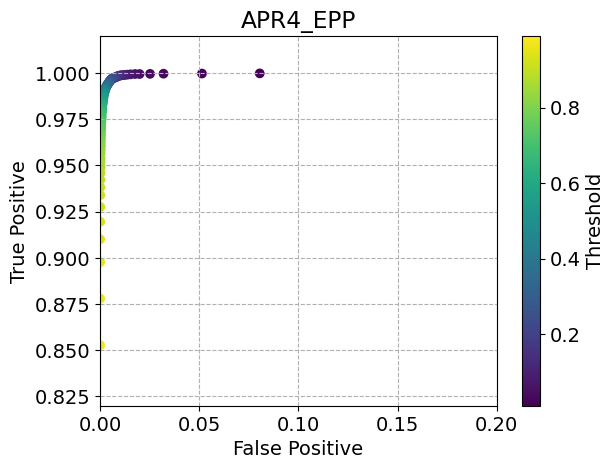

--------------------- BHF_BBB2 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.107
Threshold  0.3 TP: 0.998, FP 0.068
Threshold  0.5 TP: 0.994, FP 0.042
Threshold  0.8 TP: 0.967, FP 0.014


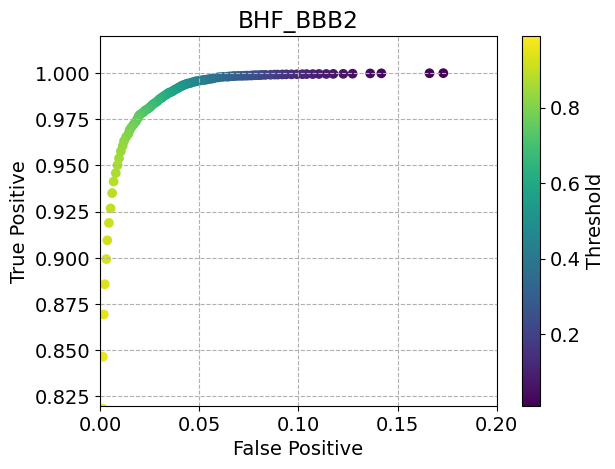

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.011
Threshold  0.3 TP: 0.993, FP 0.005
Threshold  0.5 TP: 0.985, FP 0.003
Threshold  0.8 TP: 0.957, FP 0.001


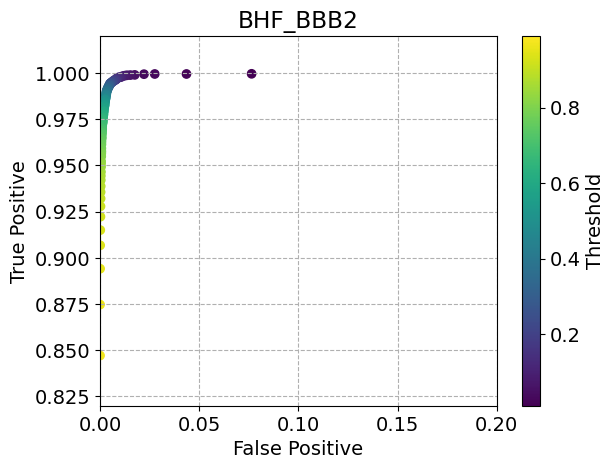

--------------------- H4 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.109
Threshold  0.3 TP: 0.998, FP 0.064
Threshold  0.5 TP: 0.994, FP 0.038
Threshold  0.8 TP: 0.966, FP 0.013


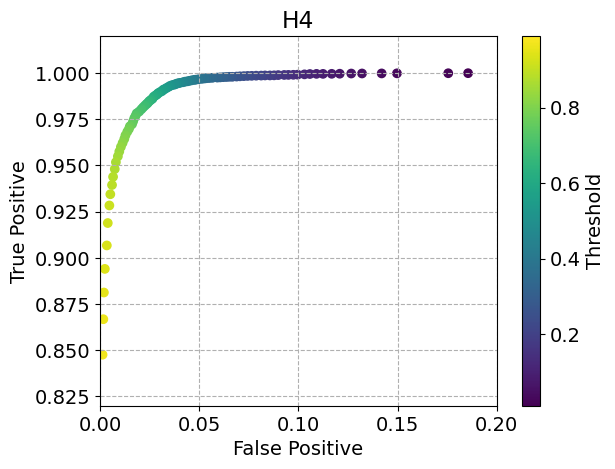

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.022
Threshold  0.3 TP: 0.996, FP 0.011
Threshold  0.5 TP: 0.988, FP 0.006
Threshold  0.8 TP: 0.956, FP 0.001


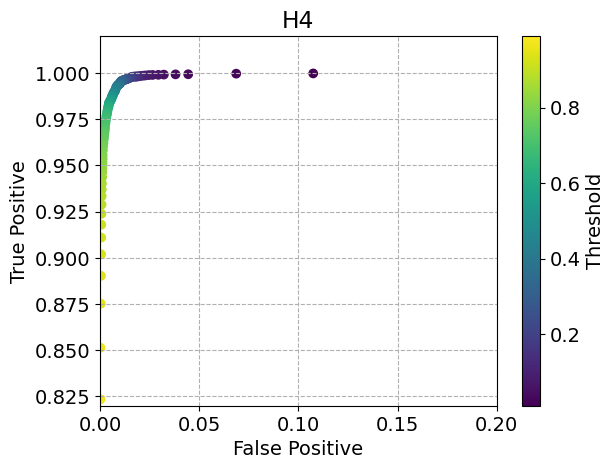

--------------------- HQC18 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.111
Threshold  0.3 TP: 0.998, FP 0.066
Threshold  0.5 TP: 0.993, FP 0.039
Threshold  0.8 TP: 0.964, FP 0.013


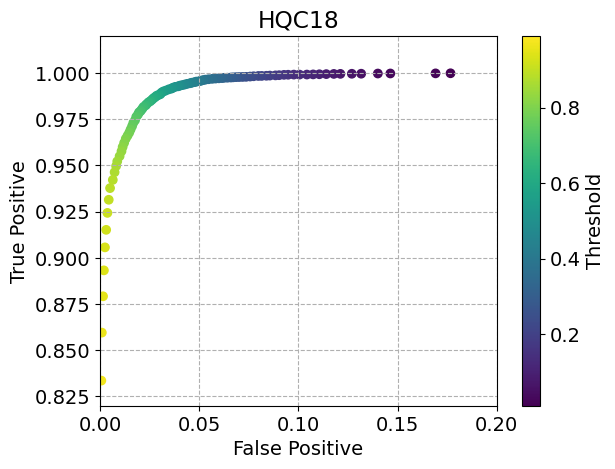

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.012
Threshold  0.3 TP: 0.994, FP 0.005
Threshold  0.5 TP: 0.987, FP 0.003
Threshold  0.8 TP: 0.961, FP 0.000


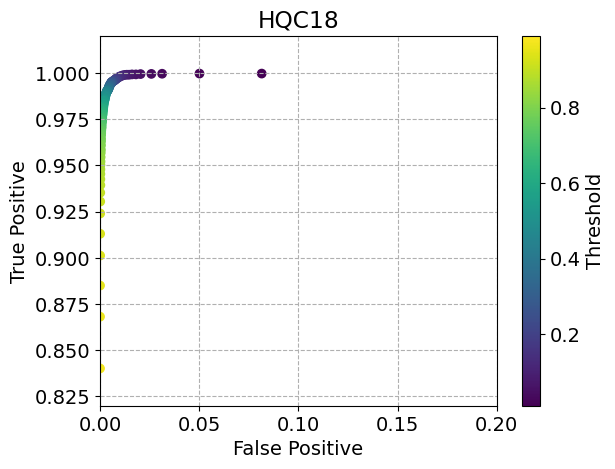

--------------------- KDE0V ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.106
Threshold  0.3 TP: 0.998, FP 0.065
Threshold  0.5 TP: 0.994, FP 0.039
Threshold  0.8 TP: 0.966, FP 0.013


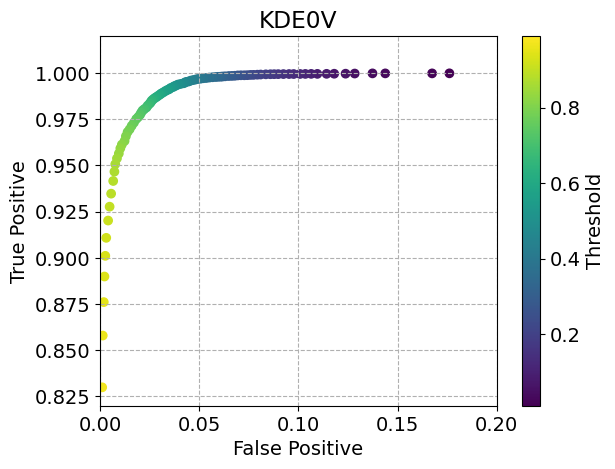

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.012
Threshold  0.3 TP: 0.993, FP 0.005
Threshold  0.5 TP: 0.985, FP 0.003
Threshold  0.8 TP: 0.960, FP 0.001


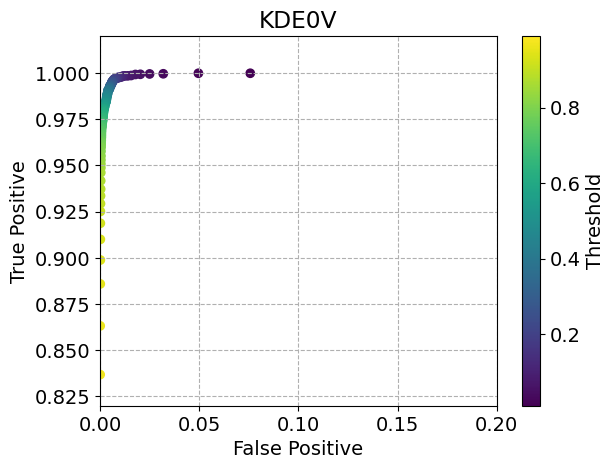

--------------------- KDE0V1 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.105
Threshold  0.3 TP: 0.998, FP 0.064
Threshold  0.5 TP: 0.994, FP 0.037
Threshold  0.8 TP: 0.968, FP 0.012


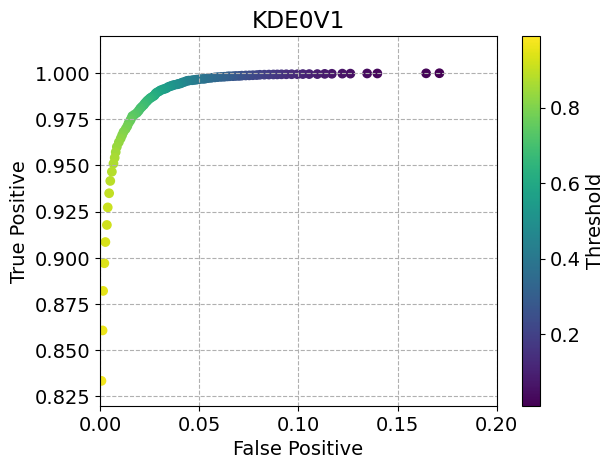

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.013
Threshold  0.3 TP: 0.992, FP 0.005
Threshold  0.5 TP: 0.983, FP 0.003
Threshold  0.8 TP: 0.954, FP 0.001


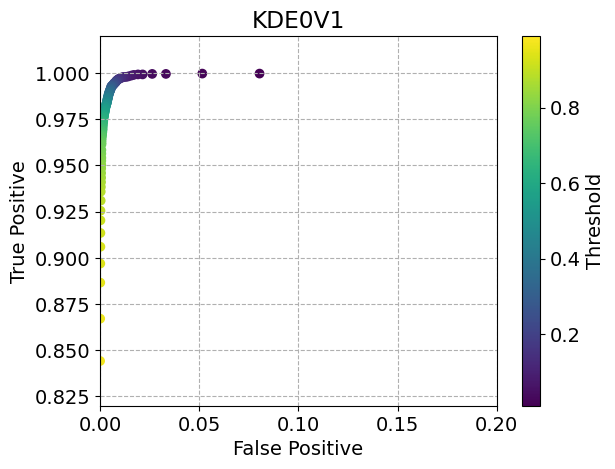

--------------------- MPA1 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.116
Threshold  0.3 TP: 0.998, FP 0.066
Threshold  0.5 TP: 0.993, FP 0.038
Threshold  0.8 TP: 0.965, FP 0.012


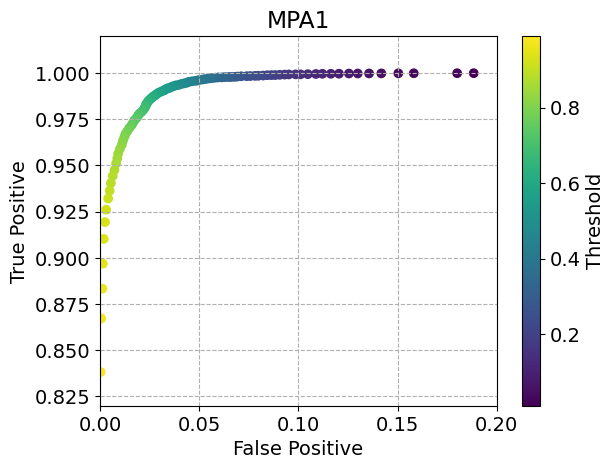

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.017
Threshold  0.3 TP: 0.995, FP 0.007
Threshold  0.5 TP: 0.989, FP 0.003
Threshold  0.8 TP: 0.964, FP 0.001


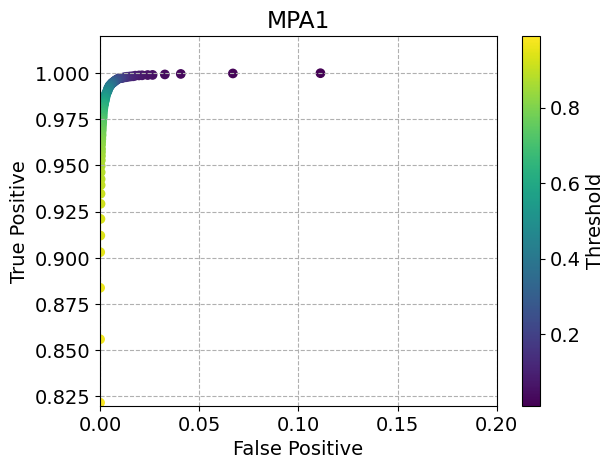

--------------------- MS1_PP ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.114
Threshold  0.3 TP: 0.998, FP 0.065
Threshold  0.5 TP: 0.994, FP 0.036
Threshold  0.8 TP: 0.968, FP 0.011


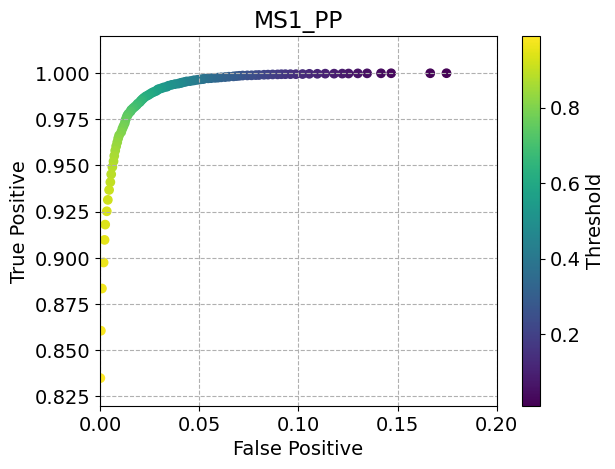

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.023
Threshold  0.3 TP: 0.996, FP 0.010
Threshold  0.5 TP: 0.990, FP 0.004
Threshold  0.8 TP: 0.967, FP 0.001


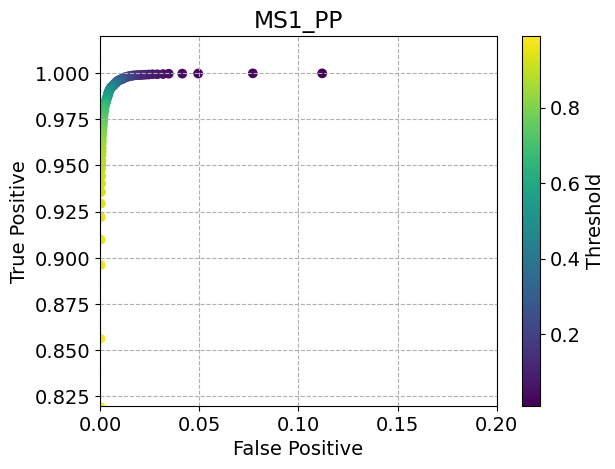

--------------------- MS1B_PP ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.113
Threshold  0.3 TP: 0.998, FP 0.064
Threshold  0.5 TP: 0.994, FP 0.035
Threshold  0.8 TP: 0.969, FP 0.011


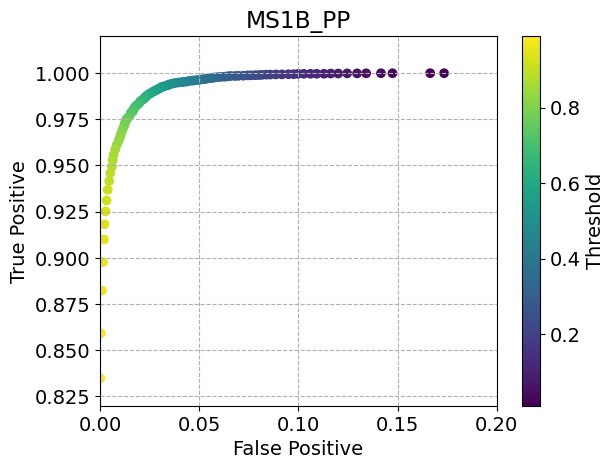

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.022
Threshold  0.3 TP: 0.996, FP 0.009
Threshold  0.5 TP: 0.990, FP 0.004
Threshold  0.8 TP: 0.967, FP 0.001


--------------------- RS ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.102
Threshold  0.3 TP: 0.998, FP 0.062
Threshold  0.5 TP: 0.993, FP 0.036
Threshold  0.8 TP: 0.963, FP 0.011


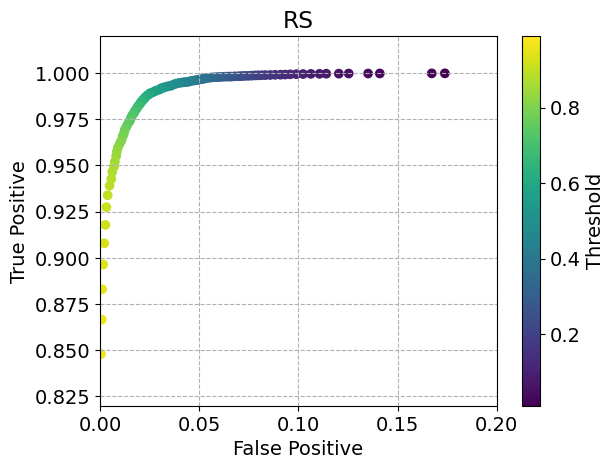

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.020
Threshold  0.3 TP: 0.995, FP 0.008
Threshold  0.5 TP: 0.986, FP 0.004
Threshold  0.8 TP: 0.953, FP 0.001


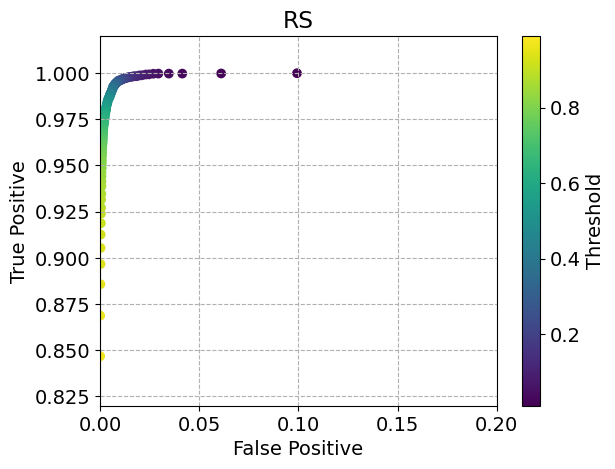

--------------------- SK255 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.106
Threshold  0.3 TP: 0.998, FP 0.064
Threshold  0.5 TP: 0.993, FP 0.037
Threshold  0.8 TP: 0.965, FP 0.011


****Has REM****
Threshold  0.1 TP: 0.999, FP 0.019
Threshold  0.3 TP: 0.995, FP 0.009
Threshold  0.5 TP: 0.987, FP 0.004
Threshold  0.8 TP: 0.957, FP 0.001


--------------------- SK272 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.109
Threshold  0.3 TP: 0.997, FP 0.063
Threshold  0.5 TP: 0.993, FP 0.040
Threshold  0.8 TP: 0.963, FP 0.011


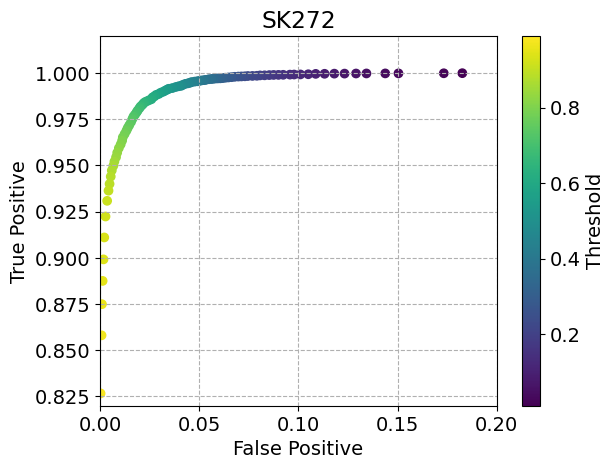

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.022
Threshold  0.3 TP: 0.995, FP 0.009
Threshold  0.5 TP: 0.988, FP 0.005
Threshold  0.8 TP: 0.960, FP 0.001


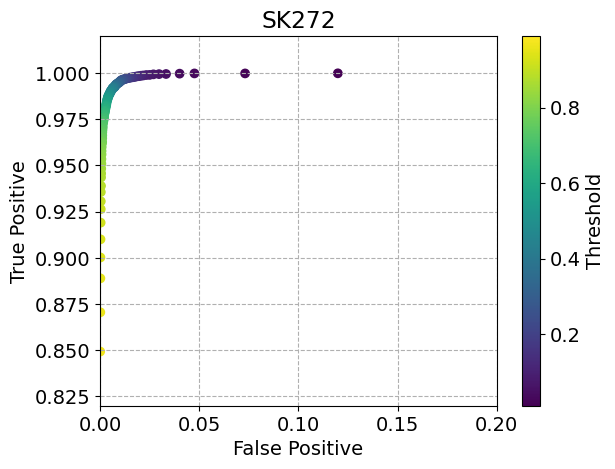

--------------------- SKI2 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.108
Threshold  0.3 TP: 0.998, FP 0.062
Threshold  0.5 TP: 0.993, FP 0.034
Threshold  0.8 TP: 0.966, FP 0.010


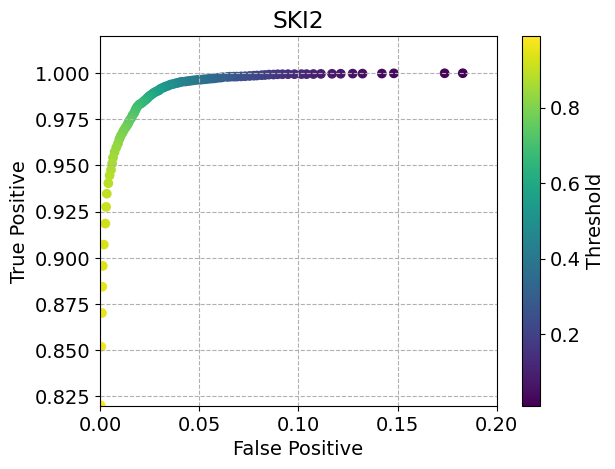

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.025
Threshold  0.3 TP: 0.994, FP 0.011
Threshold  0.5 TP: 0.986, FP 0.005
Threshold  0.8 TP: 0.954, FP 0.001


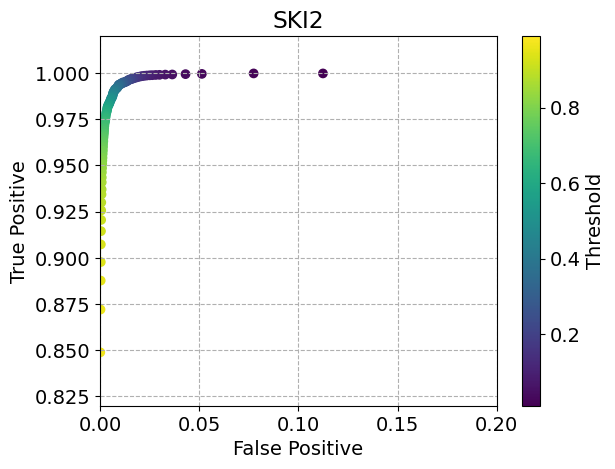

--------------------- SKI3 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.110
Threshold  0.3 TP: 0.998, FP 0.062
Threshold  0.5 TP: 0.993, FP 0.037
Threshold  0.8 TP: 0.964, FP 0.011


****Has REM****
Threshold  0.1 TP: 0.998, FP 0.024
Threshold  0.3 TP: 0.995, FP 0.011
Threshold  0.5 TP: 0.987, FP 0.006
Threshold  0.8 TP: 0.954, FP 0.001


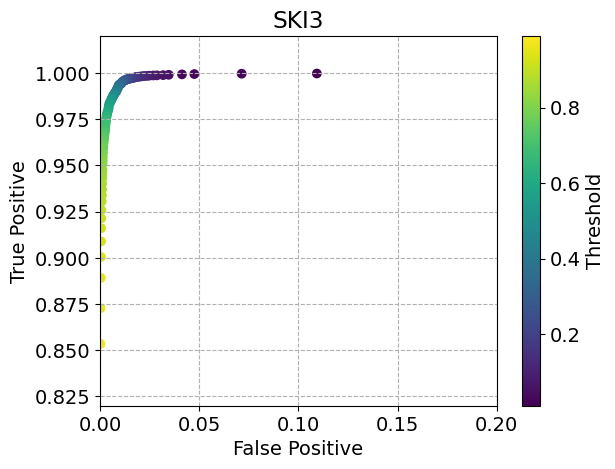

--------------------- SKI4 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.110
Threshold  0.3 TP: 0.998, FP 0.065
Threshold  0.5 TP: 0.993, FP 0.039
Threshold  0.8 TP: 0.965, FP 0.013


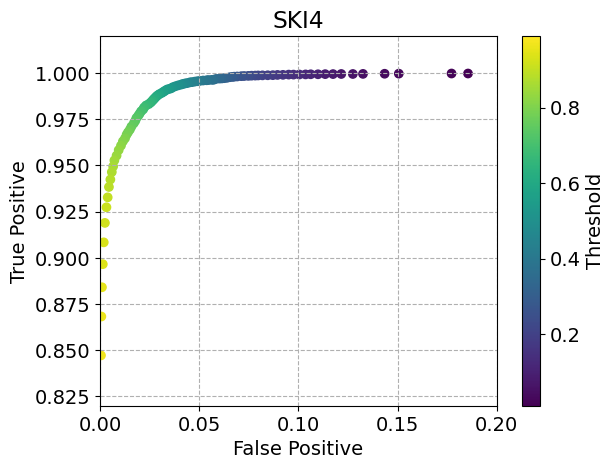

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.016
Threshold  0.3 TP: 0.994, FP 0.006
Threshold  0.5 TP: 0.985, FP 0.003
Threshold  0.8 TP: 0.959, FP 0.001


--------------------- SKI5 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.109
Threshold  0.3 TP: 0.998, FP 0.060
Threshold  0.5 TP: 0.993, FP 0.035
Threshold  0.8 TP: 0.965, FP 0.010


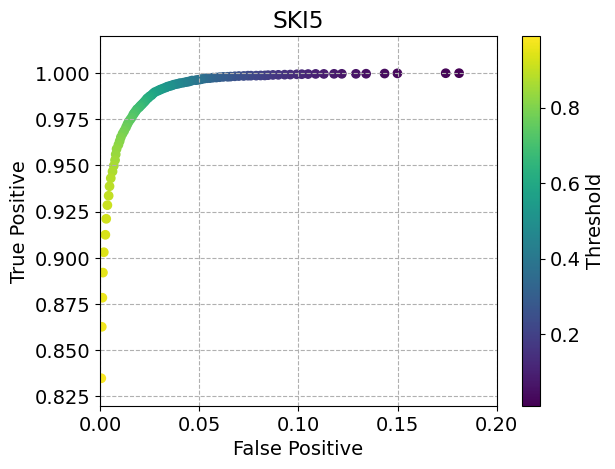

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.022
Threshold  0.3 TP: 0.996, FP 0.010
Threshold  0.5 TP: 0.989, FP 0.005
Threshold  0.8 TP: 0.966, FP 0.002


--------------------- SKI6 ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.108
Threshold  0.3 TP: 0.998, FP 0.065
Threshold  0.5 TP: 0.993, FP 0.039
Threshold  0.8 TP: 0.966, FP 0.012


****Has REM****
Threshold  0.1 TP: 0.999, FP 0.018
Threshold  0.3 TP: 0.995, FP 0.008
Threshold  0.5 TP: 0.988, FP 0.004
Threshold  0.8 TP: 0.959, FP 0.001


--------------------- SKMP ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.107
Threshold  0.3 TP: 0.998, FP 0.064
Threshold  0.5 TP: 0.994, FP 0.036
Threshold  0.8 TP: 0.965, FP 0.011


****Has REM****
Threshold  0.1 TP: 0.999, FP 0.017
Threshold  0.3 TP: 0.995, FP 0.008
Threshold  0.5 TP: 0.986, FP 0.004
Threshold  0.8 TP: 0.957, FP 0.001


--------------------- SKOP ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.102
Threshold  0.3 TP: 0.998, FP 0.062
Threshold  0.5 TP: 0.993, FP 0.037
Threshold  0.8 TP: 0.966, FP 0.013


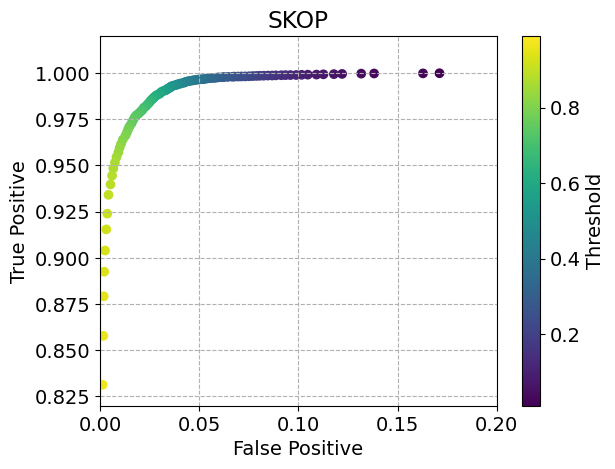

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.015
Threshold  0.3 TP: 0.994, FP 0.006
Threshold  0.5 TP: 0.987, FP 0.003
Threshold  0.8 TP: 0.958, FP 0.001


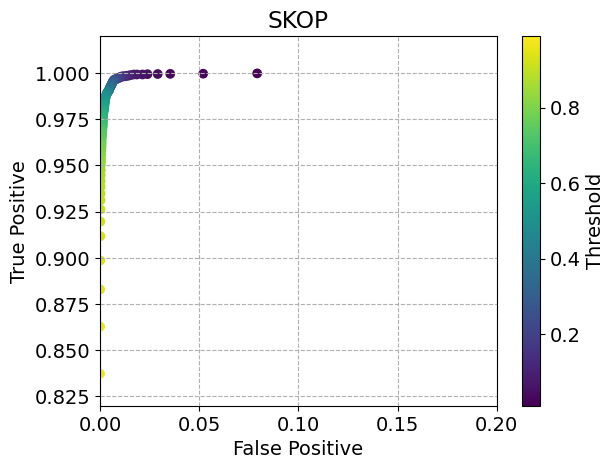

--------------------- SLy ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.107
Threshold  0.3 TP: 0.999, FP 0.064
Threshold  0.5 TP: 0.994, FP 0.038
Threshold  0.8 TP: 0.965, FP 0.012


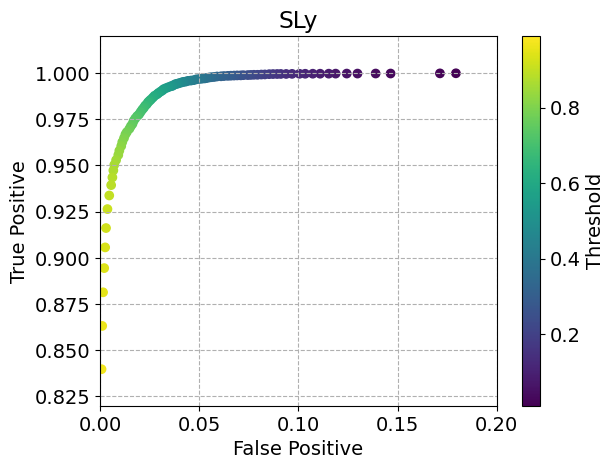

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.013
Threshold  0.3 TP: 0.993, FP 0.005
Threshold  0.5 TP: 0.986, FP 0.003
Threshold  0.8 TP: 0.958, FP 0.001


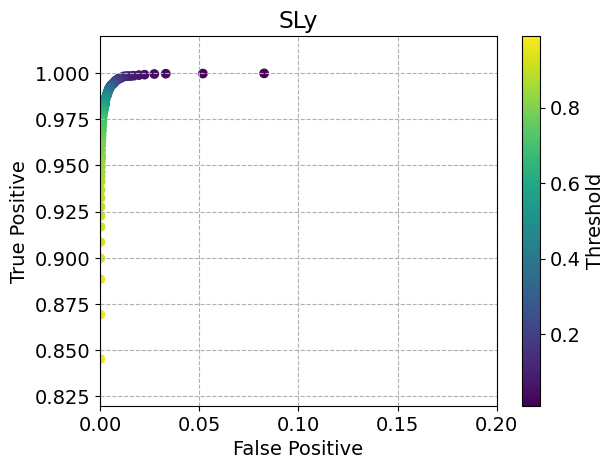

--------------------- SLY2 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.107
Threshold  0.3 TP: 0.998, FP 0.065
Threshold  0.5 TP: 0.994, FP 0.040
Threshold  0.8 TP: 0.965, FP 0.014


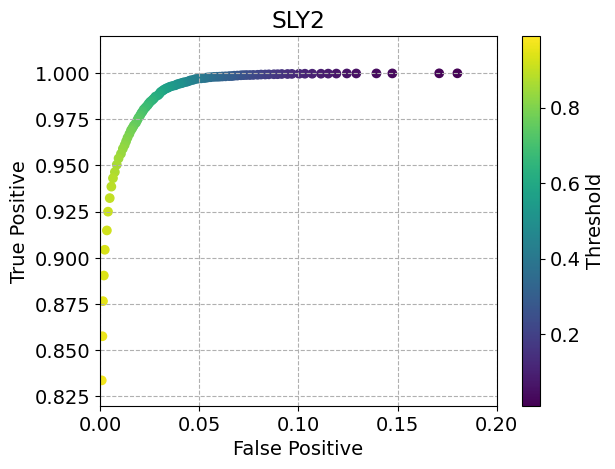

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.013
Threshold  0.3 TP: 0.993, FP 0.005
Threshold  0.5 TP: 0.986, FP 0.003
Threshold  0.8 TP: 0.957, FP 0.000


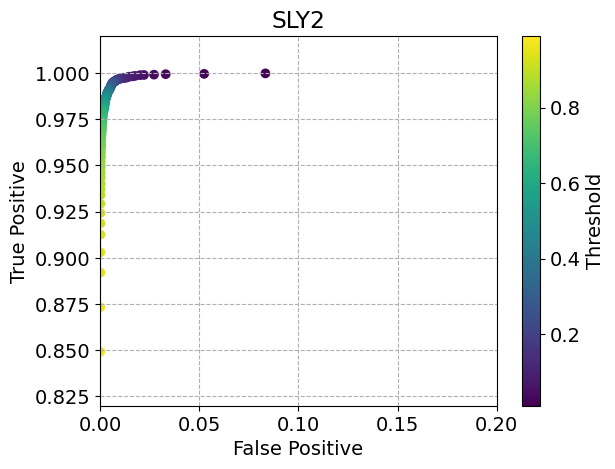

--------------------- SLY9 ----------------
****Has NS****
Threshold  0.1 TP: 1.000, FP 0.113
Threshold  0.3 TP: 0.998, FP 0.065
Threshold  0.5 TP: 0.994, FP 0.039
Threshold  0.8 TP: 0.965, FP 0.012


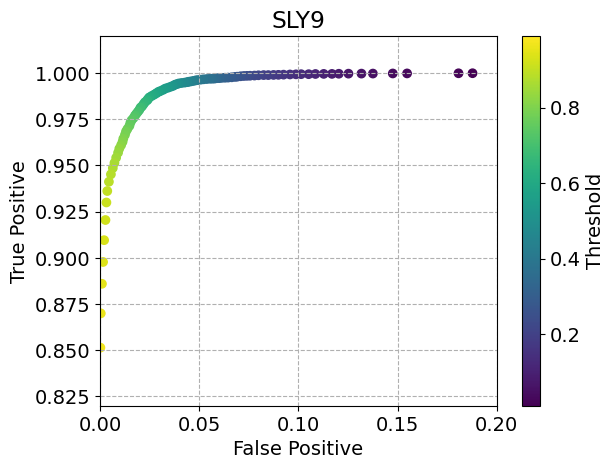

****Has REM****
Threshold  0.1 TP: 0.998, FP 0.017
Threshold  0.3 TP: 0.994, FP 0.007
Threshold  0.5 TP: 0.986, FP 0.003
Threshold  0.8 TP: 0.958, FP 0.001


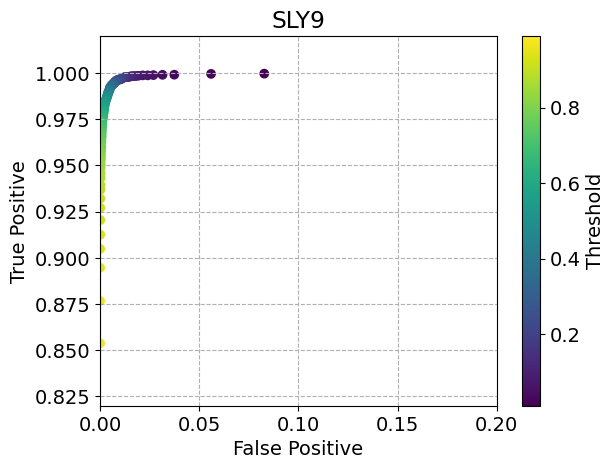

--------------------- SLY230A ----------------
****Has NS****
Threshold  0.1 TP: 0.999, FP 0.108
Threshold  0.3 TP: 0.998, FP 0.066
Threshold  0.5 TP: 0.993, FP 0.041
Threshold  0.8 TP: 0.966, FP 0.014


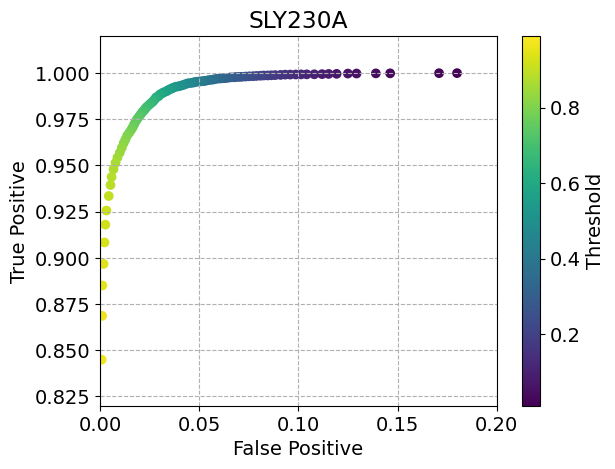

****Has REM****
Threshold  0.1 TP: 0.999, FP 0.014
Threshold  0.3 TP: 0.994, FP 0.005
Threshold  0.5 TP: 0.986, FP 0.003
Threshold  0.8 TP: 0.962, FP 0.001


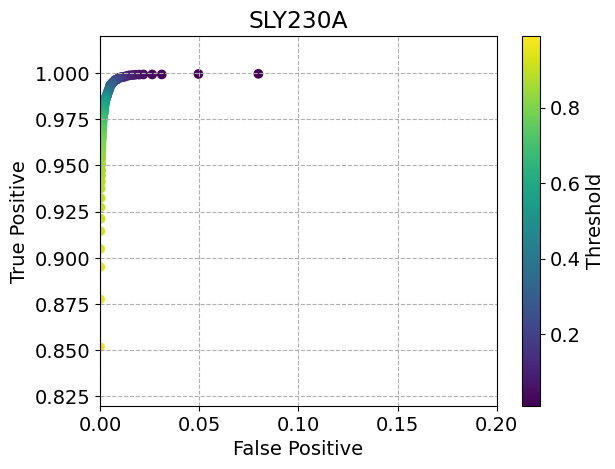

In [13]:
for eos in EOS:
    print("---------------------",eos,"----------------")
    print("****Has NS****")
    EOSdic[eos]['NS_FP'], EOSdic[eos]['NS_TP'], EOSdic[eos]['NS_thr'] = EOSdic[eos]['forest'].ROC_NS(eos, thr_wanted = [0.1, 0.3, 0.5, 0.8, 0.95])
    print("****Has REM****")
    EOSdic[eos]['REM_FP'], EOSdic[eos]['REM_TP'], EOSdic[eos]['REM_thr'] = EOSdic[eos]['forest'].ROC_REM(eos, thr_wanted = [0.1, 0.3, 0.5, 0.8, 0.95])
    with open('NS_ROC_'+eos+'.txt','w') as f:
        f.write('#FP  TP  Thr\n')
        np.savetxt(f, EOSdic[eos]['NS_FP'], fmt='%f')
        np.savetxt(f, EOSdic[eos]['NS_TP'], fmt='%f')
        np.savetxt(f, EOSdic[eos]['NS_thr'], fmt='%f')
    with open('REM_ROC_'+eos+'.txt','w') as f:
        f.write('#FP  TP  Thr\n')
        np.savetxt(f, EOSdic[eos]['REM_FP'], fmt='%f')
        np.savetxt(f, EOSdic[eos]['REM_TP'], fmt='%f')
        np.savetxt(f, EOSdic[eos]['REM_thr'], fmt='%f')

## Function to classify

In [ ]:
def classify_event(m1, m2, x1, x2, snr):
    event = np.asarray([m1, m2, x1, x2, snr])
    event = event.reshape((1,5))
    total = sum(BayesFactor)
    prob0 = 0; prob1 = 0; prob2 = 0
    for eos in EOS:
        prob = EOSdic[eos]['forest'].model.predict_proba(event)
        prob = prob * EOSdic[eos]['weight']
        prob0 = prob0 + prob[0]
        prob1 = prob1 + prob[1]
        prob2 = prob2 + prob[2]
    
    print("P(HasNS)={:.4f}, P(HasREM)={:.4f}".format(1-prob0/total, prob2/total))
    return prob0/total, prob1/total, prob2/total
        

## All ROCs

### Read ROC curves

In [6]:
EOSdic = {}
for eos in EOS:
    newdic = {}
    dataNS = np.loadtxt('NS_ROC_'+eos+'.txt')
    dataREM = np.loadtxt('REM_ROC_'+eos+'.txt')
    newdic['NS_FP'] = dataNS[0:100]
    newdic['NS_TP'] = dataNS[100:200]
    newdic['REM_FP'] = dataREM[0:100]
    newdic['REM_TP'] = dataREM[100:200]
    EOSdic[eos] = newdic


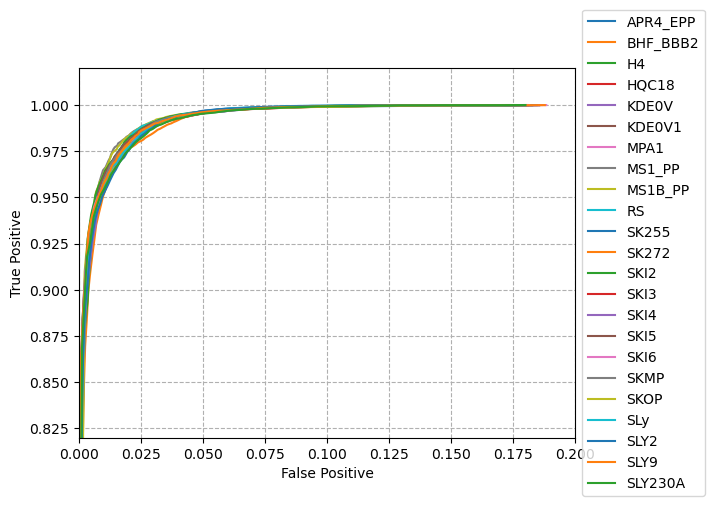

In [7]:
plt.figure()
for eos in EOS:
    plt.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], label=eos)
    
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid(ls='--')
plt.ylim([0.82,1.02])
plt.xlim([0,0.2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.linspace(0.825,1,8))
plt.show()

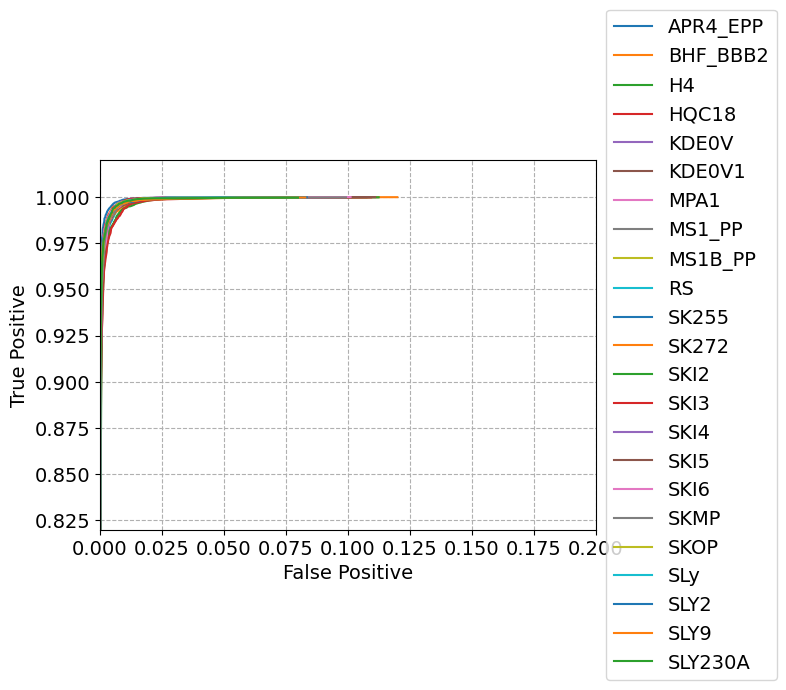

In [15]:
plt.figure()
for eos in EOS:
    plt.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], label=eos)
    
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid(ls='--')
plt.ylim([0.82,1.02])
plt.xlim([0,0.2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.linspace(0.825,1,8))
plt.show()

In [7]:
EOSgrey = ["APR4_EPP",  "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLY2", "SLY9", "SLY230A"]
EOScolor = ["BHF_BBB2", "MS1_PP", "SLy"]
color = ["orange", "blue", "green"]

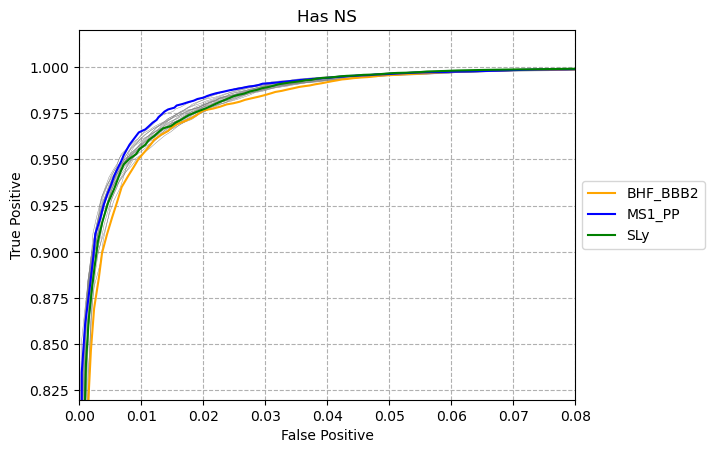

In [18]:
plt.figure()
plt.title("Has NS")
for eos in EOSgrey:
    plt.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], c='grey', linewidth=0.3)
for i in range(0,len(EOScolor)):
    eos=EOScolor[i]
    plt.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], c=color[i], label=eos)    

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid(ls='--')
plt.ylim([0.82,1.02])
plt.xlim([0,0.08])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.linspace(0.825,1,8))
plt.savefig('HasNS_roc.png',dpi=200,bbox_inches='tight')
plt.show()

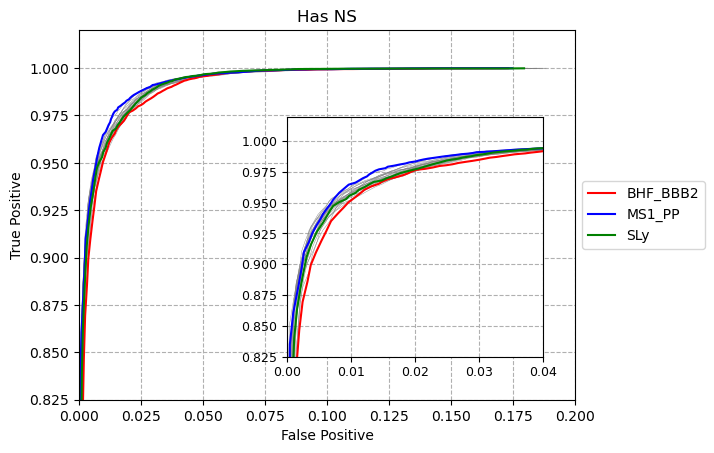

In [13]:
fig, ax1 = plt.subplots()
plt.title("Has NS")
for eos in EOSgrey:
    ax1.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], c='grey', linewidth=0.3)
for i in range(0,len(EOScolor)):
    eos=EOScolor[i]
    ax1.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], c=color[i], label=eos) 
ax1.set_xlabel("False Positive")
ax1.set_ylabel("True Positive")
ax1.grid(ls='--')
ax1.set_ylim([0.925,1.02])
ax1.set_xlim([0,0.2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_yticks(np.linspace(0.825,1,8))

plt.rcParams["font.size"]=9
left, bottom, width, height = [0.45, 0.2, 0.4, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])
for eos in EOSgrey:
    ax2.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], c='grey', linewidth=0.3)
for i in range(0,len(EOScolor)):
    eos=EOScolor[i]
    ax2.plot(EOSdic[eos]['NS_FP'],EOSdic[eos]['NS_TP'], c=color[i], label=eos)   
ax2.grid(ls='--')
ax2.set_ylim([0.9,1.02])
ax2.set_xlim([0,0.04])
ax2.set_yticks(np.linspace(0.825,1,8))

plt.show()


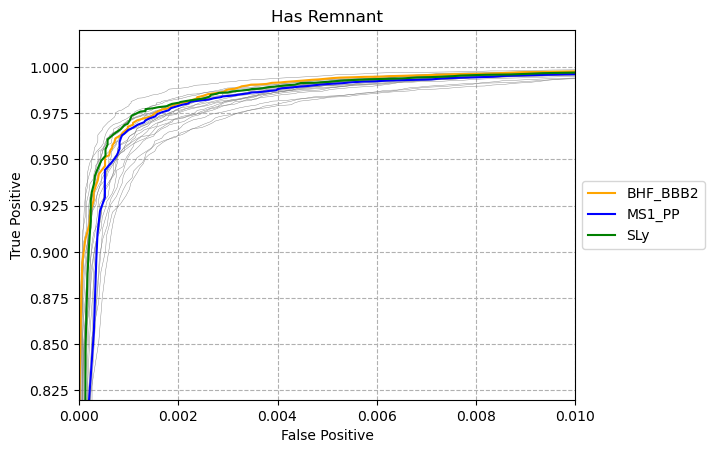

In [17]:
plt.figure()
plt.title("Has Remnant")
for eos in EOSgrey:
    plt.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], c='grey', linewidth=0.3)
for i in range(0,len(EOScolor)):
    eos=EOScolor[i]
    plt.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], c=color[i], label=eos) 
    
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid(ls='--')
plt.ylim([0.82,1.02])
plt.xlim([0,0.01])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.linspace(0.825,1,8))
plt.savefig('HasREM_roc.png',dpi=200,bbox_inches='tight')
plt.show()

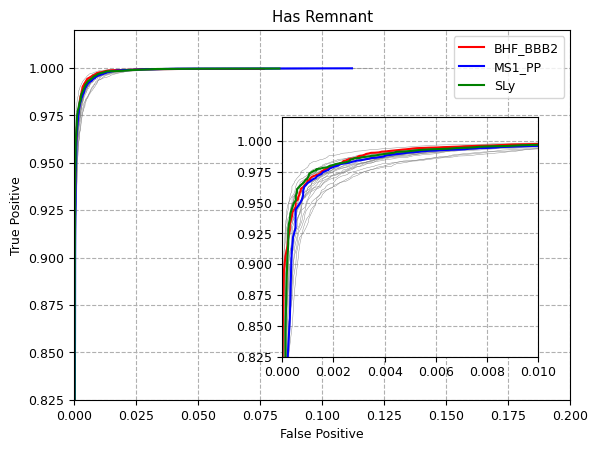

In [15]:
fig, ax1 = plt.subplots()
plt.title("Has Remnant")

for eos in EOSgrey:
    ax1.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], c='grey', linewidth=0.3)
for i in range(0,len(EOScolor)):
    eos=EOScolor[i]
    ax1.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], c=color[i], label=eos) 
ax1.set_xlabel("False Positive")
ax1.set_ylabel("True Positive")
ax1.grid(ls='--')
ax1.set_ylim([0.925,1.02])
ax1.set_xlim([0,0.2])
ax1.legend(loc=1)
ax1.set_yticks(np.linspace(0.825,1,8))

plt.rcParams["font.size"]=9
left, bottom, width, height = [0.45, 0.2, 0.4, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])
for eos in EOSgrey:
    ax2.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], c='grey', linewidth=0.3)
for i in range(0,len(EOScolor)):
    eos=EOScolor[i]
    ax2.plot(EOSdic[eos]['REM_FP'],EOSdic[eos]['REM_TP'], c=color[i], label=eos) 
ax2.grid(ls='--')
ax2.set_ylim([0.975,1.02])
ax2.set_xlim([0,0.01])
ax2.set_yticks(np.linspace(0.825,1,8))
plt.show()



plt.show()

## Parameter sweep (fig4, fig6)

In [25]:
def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=15
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    events=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                events.append([m1[i],m2[j]])
    return events

def probLabelDensePlot(algo, masses, chi1, chi2, snr, label, figname="sweep"):
    N=len(masses)    
    Nfigures=len(chi1)
        
    f, (ax) = plt.subplots(Nfigures,1,figsize=(10, 3*Nfigures),constrained_layout=True)
    for i in range (0,Nfigures):
        X=[]
        m1=np.zeros(N)
        m2=np.zeros(N)
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1[i],chi2[i],snr[i]])
            m1[k]=masses[k][0]
            m2[k]=masses[k][1]
        for eos in EOS:
            EOSdic[eos]['sweep'] = EOSdic[eos]['forest'].model.predict_proba(X)
        #proba_dense = algo.model.predict_proba(X)
        
        ax[i].tick_params(axis='y',labelsize=13)
        ax[i].tick_params(axis='x',labelsize=13)        
        
        if label == 'NS':
            probability_ns = 0.0
            for eos in EOS:
                probability_ns = probability_ns + (EOSdic[eos]['sweep'][:,1]+EOSdic[eos]['sweep'][:,2])*EOSdic[eos]['weight']
            probability_ns = probability_ns/sum(BayesFactor)
            print(max(probability_ns))
            sc=ax[i].scatter(m1,m2, c=probability_ns, vmin=0, vmax=1, s=40, cmap='viridis')
            ax[i].set_yticks([1.0,3.0,10.0])
            ax[i].set_xticks([10.0,30.0,50.0])
            ax[i].axhline(y = 3, color = 'r', linestyle = '-')

        if label == 'REM':
            probability_rem = 0.0
            for eos in EOS:
                probability_rem = probability_rem + (EOSdic[eos]['sweep'][:,2])*EOSdic[eos]['weight']
            probability_rem = probability_rem/sum(BayesFactor)
            print(max(probability_rem))
            ax[i].set_xticks([2.83,10.0,30.0,50.0])
            ax[i].set_yticks([1.0,2.83,10.0])
            sc=ax[i].scatter(m1,m2, c=probability_rem, vmin=0, vmax=1, s=40, cmap='viridis')
            #redline=calculate_red_line(chi1[i])
            #redline[1].insert(0,2.83)
            #redline[1].insert(0,2.83)
            #redline[0].insert(0,2.83)
            #redline[0].insert(0,1)
            #ax[i].plot(redline[0],redline[1], color = 'r', linestyle = '-')
            
        ax[i].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr[i]),fontsize=18)
        if i==Nfigures-1:
            ax[i].set_xlabel(r"$m_1[M_\odot]$", fontsize=18)
        ax[i].set_xlim([1,50])
        ax[i].set_ylim([1,15])
        ax[i].set_ylabel(r"$m_2[M_\odot]$", fontsize=18)
    
    f.colorbar(sc, ax=ax, shrink=0.8)
    
    
   # if algo.save_plots:
    plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
  #  if algo.show_plots:
    plt.show()
    return

In [27]:
M=generateMasses_limited(1000);

1.0000000000000002
0.9976368563685636
0.9999331652639307
0.9999598694762457


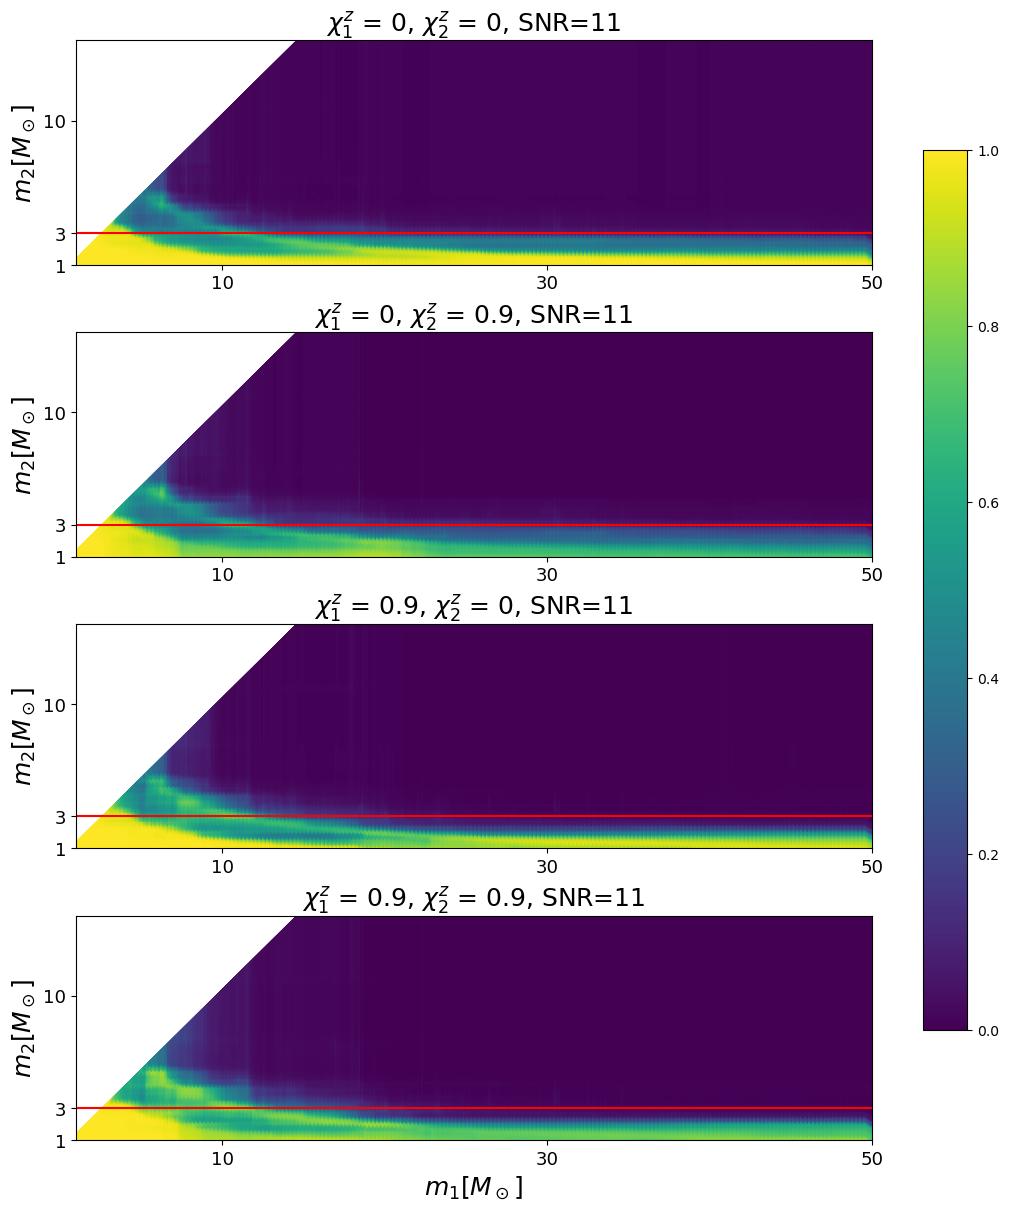

1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002


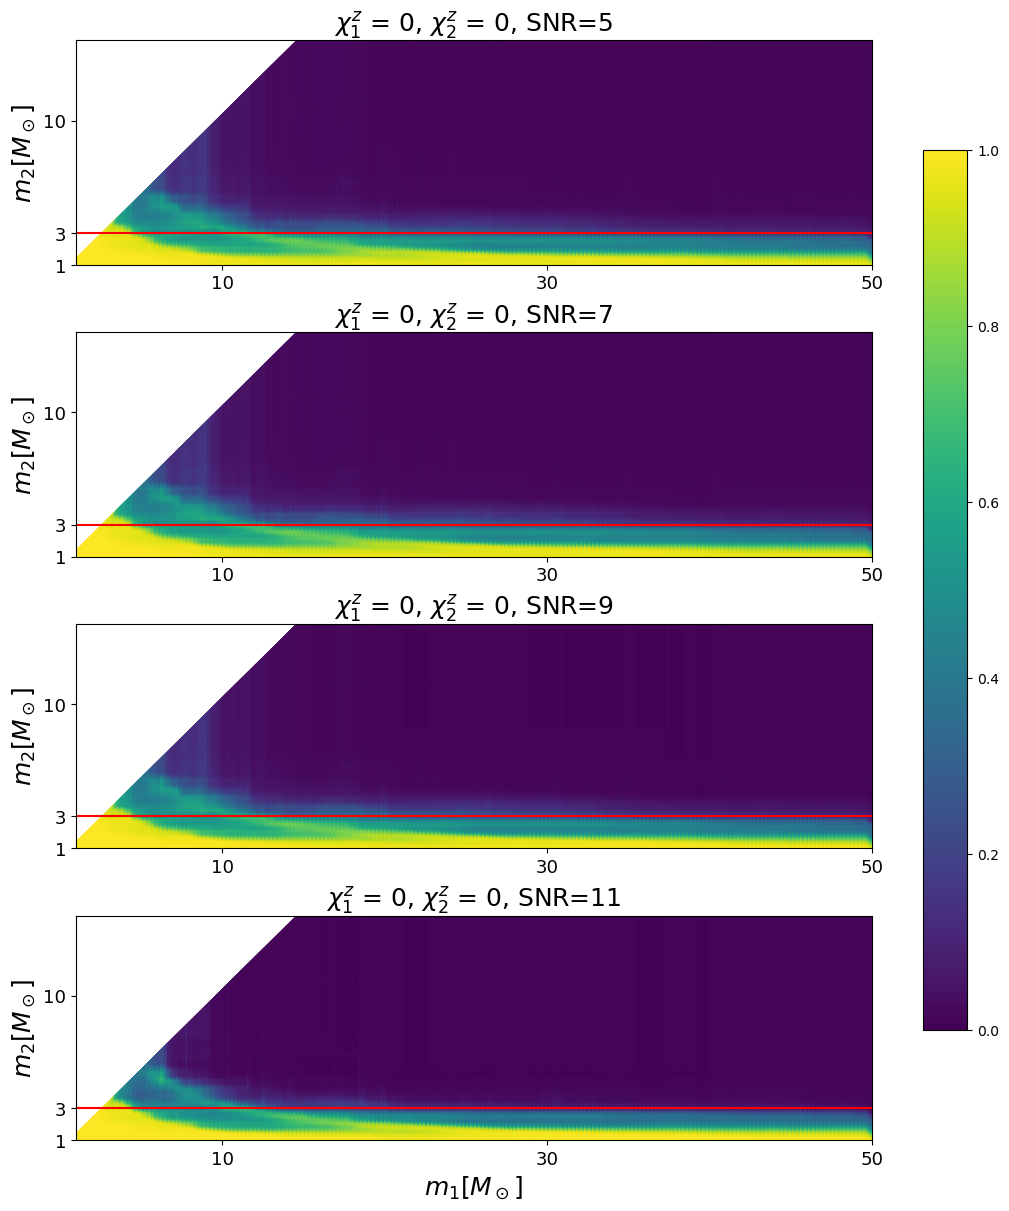

In [30]:
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'NS',pathClassy+"final_sweep1_bns")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'NS',pathClassy+"final_sweep2_bns")


0.9999999991933975
0.9821497059528421
0.9998454567329886
0.9993715622348711


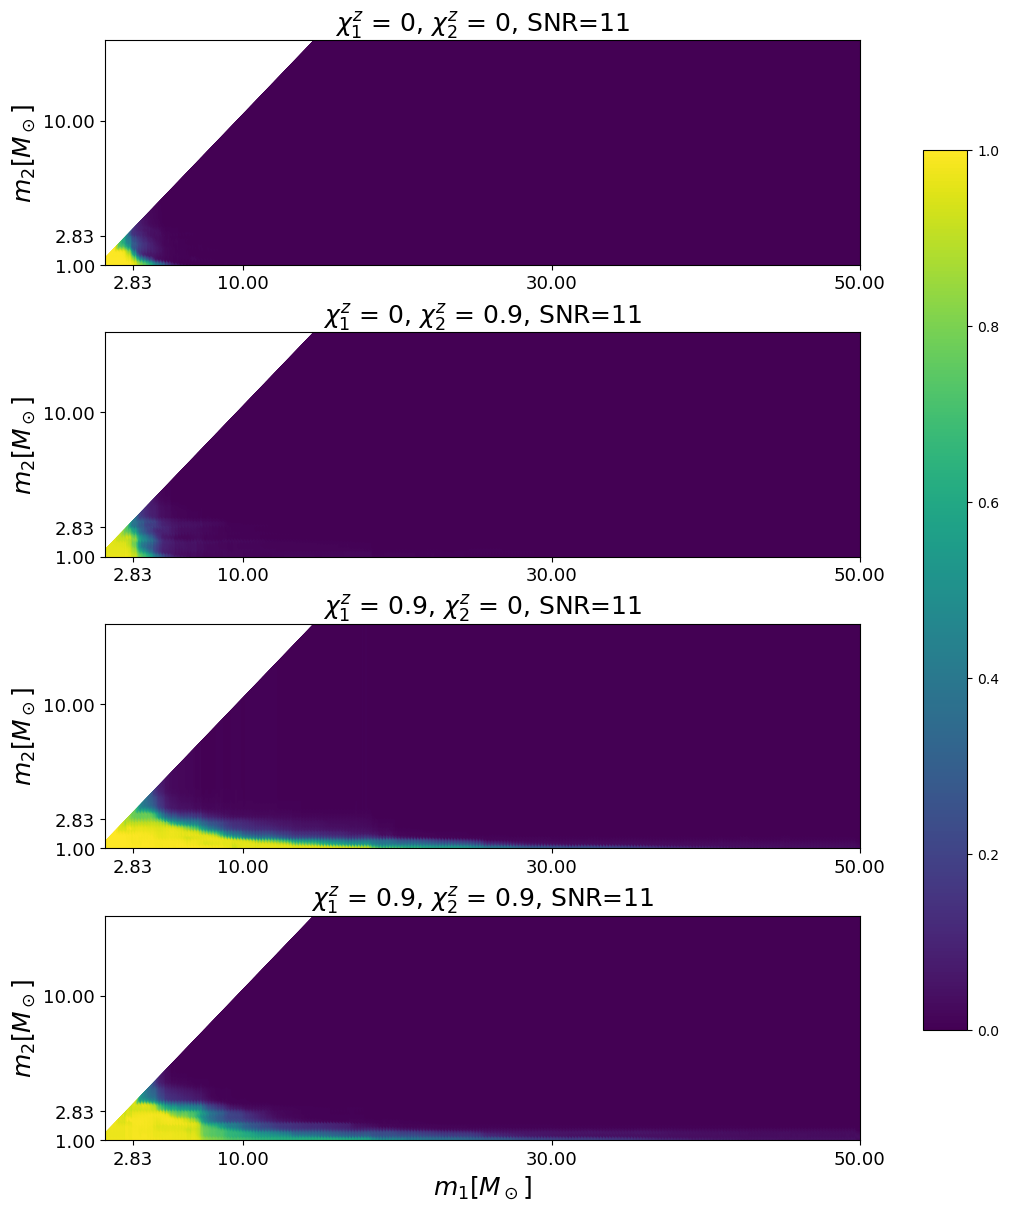

0.9996104890552939
0.9996104890552939
0.9999838638750294
0.9999999991933975


In [31]:
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'REM',pathClassy+"final_sweep1_rem")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'REM',pathClassy+"final_sweep2_rem")

## More types of score

In [ ]:
pred=RF.test_prediction

In [ ]:
true=RF.labels_test

In [ ]:
N=len(true);
tp=0; fp=0; fn=0; tn=0;
for i in range(0,N):
    if true[i]==1:
        if pred[i]==1:
            tp=tp+1
        else:
            fn=fn+1
    else:
        if pred[i]==1:
            fp=fp+1
        else:
            tn=tn+1
tpr=tp/N; fpr=fp/N; fnr=fn/N; tnr=tn/N;            

In [ ]:
print(tp,fp,fn,tn)
print(tpr,fpr,fnr,tnr)

In [ ]:
sensitivity=tpr/(tpr+fnr)
precision=tpr/(tpr+fpr)
f1score=2*(precision*sensitivity)/(precision+sensitivity)
print(sensitivity,precision,f1score)

## Measure evaluation time

In [ ]:
import time

In [ ]:
event=[30,22,0.1,-0.6,11]
event=np.asarray(event)
event=event.reshape(1, -1)
times=[]
for k in range(0,23):
    t0=time.perf_counter()
    RF.model.predict(event)
    total_time=time.perf_counter()-t0
    times.append(total_time)
print("Mean time evaluating", np.mean(times), np.std(times),np.max(times),np.min(times), np.sum(times))

In [ ]:
events=RF.data_test[0:500]
t0=time.perf_counter()
RF.model.predict(events)
total_time=time.perf_counter()-t0
print(total_time, total_time/500)

In [ ]:
t0=time.perf_counter()
RFrem.model.predict(RFrem.data_test)
total_time=time.perf_counter()-t0
print(total_time, total_time/len(RFrem.data_test))

## Line mass remnant = 0

In [ ]:
outseq=np.loadtxt("outseq.d")
radius=outseq[:,0]
masses=outseq[:,2]

In [ ]:
def Risco(chi1):
    z1=1+(1-chi1**2)**(1.0/3)*((1+chi1)**(1.0/3)+(1-chi1)**(1.0/3))
    z2=np.sqrt(3*chi1**2+z1**2)
    return 3+z2-np.sign(chi1)*np.sqrt((3-z1)*(3+z1+2*z2))

In [ ]:
from scipy.optimize import fsolve
from scipy import interpolate

In [ ]:
f = interpolate.interp1d(masses, radius,bounds_error=False, fill_value='extrapolate')
def R_km(m2):
    return f(m2)

In [ ]:
alpha=0.406; beta=0.139; gamma=0.255; delta=1.761
factor=1.98847e30/(1e5*0.001)*(6.67408e-8/898755178736817640000.0)

def Mrem(m1, Risco):
    return lambda m2 : (alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma)**delta

def Mrem_check(m1,m2,Risco):
    return np.max(alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma,0)**delta

In [ ]:
def calculate_red_line(chi1):
    m1_values=np.linspace(2.84,50,100); m2_values=[]
    for m1 in m1_values:
        m2_values.append(fsolve(Mrem(m1,Risco(chi1)), np.min(masses)))
        #m2_values.append((least_squares(Mrem(m1,Risco(chi1)), 1.2, bounds = (np.min(masses), np.max(masses)))).x[0])
    return [m1_values.tolist(), m2_values]

## Real events

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv(pathData+'real_data.csv')

In [24]:
df.head()

event_id grace_id     m1_rec     m2_rec  chi1_rec  chi2_rec      snr  GWTC
0  GW170823  G298936  59.126324  24.816019 -0.298205  0.898520  11.2960     1
1  GW170817  G298048   1.527005   1.242296 -0.015902 -0.035747  14.4500     1
2  GW170814  G297595  29.478622  24.901943 -0.568798  0.130793  16.1496     1
3  GW170809  G296853  43.061466  30.084999 -0.120968  0.846714  11.2619     1
4  GW190408  G329243  32.132198  23.224018  0.279017 -0.647443  13.9286     2

In [28]:
columns = df[['m1_rec', 'm2_rec', 'chi1_rec', 'chi2_rec', 'snr']]

# Convert the DataFrame to a Numpy array
events = columns.values

In [59]:
for eos in EOS:
    EOSdic[eos]['probs'] = EOSdic[eos]['forest'].model.predict_proba(events)

In [60]:
pHasNS = np.zeros(len(df));  pHasREM = np.zeros(len(df));
for eos in EOS:
    pHasNS += (1 - EOSdic[eos]['probs'][:,0]) * EOSdic[eos]['weight']
    pHasREM += EOSdic[eos]['probs'][:,2]  * EOSdic[eos]['weight']
total = sum(BayesFactor)

In [61]:
df['p(HasNS)'] = pHasNS/total
df['p(HasREM)'] = pHasREM/total

In [62]:
df

event_id grace_id      m1_rec     m2_rec  chi1_rec  chi2_rec  \
0          GW170823  G298936   59.126324  24.816019 -0.298205  0.898520   
1          GW170817  G298048    1.527005   1.242296 -0.015902 -0.035747   
2          GW170814  G297595   29.478622  24.901943 -0.568798  0.130793   
3          GW170809  G296853   43.061466  30.084999 -0.120968  0.846714   
4          GW190408  G329243   32.132198  23.224018  0.279017 -0.647443   
5          GW190412  G329483   26.368868  12.002029  0.447732 -0.726978   
6   GW190413_052954  G329577   45.688461  32.476582 -0.871232  0.141259   
7   GW190413_134308  G329615   73.181816  67.166664 -0.143886  0.241004   
8          GW190421  G330300   57.254688  21.741816 -0.995402 -0.216579   
9          GW190425  G330564    2.266128   1.306907  0.088769 -0.027512   
10         GW190426  G330687    7.590450   1.339249  0.067198 -0.007581   
11         GW190503  G331315   55.742626   7.720621 -0.740169 -0.829573   
12         GW190512  G332169   26.352001  16.432217 -0.598480  0.802231   
13         GW190513  G332333   47.117332  23.614485  0.038690  0.145947   
14         GW190517  G333132   48.227360  43.633629  0.653985  0.932955   
15         GW190519  G333443   91.274368  37.288105  0.322839  0.147511   
16  GW190521_074359  G333664   42.442223  33.601784 -0.697021 -0.155956   
17         GW190602  G335015   99.914513   5.767400 -0.389662 -0.888722   
18         GW190630  G337426   47.117332  23.614485  0.038690  0.145947   
19         GW190706  G337919  133.333330  37.090908  0.590816  0.969248   
20         GW190707  G337978   41.523457   4.112645  0.584189  0.589589   
21         GW190708  G338125   78.389603   5.766267  0.686623  0.813652   
22         GW190720  G344653   17.278727   8.200110 -0.061079  0.762016   
23         GW190727  G345173   47.362637  28.559050 -0.953421  0.030223   
24         GW190728  G345315   21.592342  21.592342  0.459959 -0.600577   
25         GW190814  G347305   20.846231   3.045587 -0.220753  0.386755   
26  GW190828_063405  G348500   52.002979  27.973516 -0.025977  0.329331   
27  GW190828_065509  G348519   30.383705  12.924967 -0.241386  0.694826   
28         GW190915  G350491   34.684841  32.121094  0.211614 -0.951023   
29         GW190924  G351423   14.338296   4.125206  0.165658  0.590497   
30         GW190930  G351993   36.524567   4.330317  0.674522 -0.918339   
31         GW191109  G354231  106.235710  10.805781  0.495254  0.278808   
32         GW191129  G355916   13.095535   7.427211  0.118102  0.101901   
33  GW191204_171526  G356500   16.022400   7.993040  0.111097  0.573796   
34         GW191215  G357403   47.154507  17.760225  0.077376  0.273546   
35         GW191216  G357490   34.448246   3.892543  0.613180  0.370414   
36         GW191222  G358088   80.275490  11.620949 -0.734323 -0.322937   
37         GW200112  G359994   50.928673  32.735661  0.752192 -0.974956   
38         GW200115  G360364    4.304630   2.084976 -0.652943  0.041389   
39         GW200129  G361581   47.739670  29.955526  0.831136 -0.983558   
40         GW200219  G364596   61.230534  10.482111 -0.813236 -0.926772   
41         GW200224  G365371   86.812164  13.472847  0.009163  0.009163   
42         GW200225  G365427   20.317394  19.071180  0.386950 -0.901944   
43         GW200302  G366190   47.138294  27.403164  0.361661 -0.600572   
44         GW200311  G367788   34.684841  32.121094  0.211614 -0.951023   
45         GW200316  G368545   36.925163   4.943711  0.587454 -0.145408   
46         GW200322  G369200   54.669945  15.419386  0.995742  0.862830   

        snr  GWTC      p(HasNS)     p(HasREM)  
0   11.2960     1  2.322732e-05  0.000000e+00  
1   14.4500     1  1.000000e+00  9.999754e-01  
2   16.1496     1  1.940078e-04  0.000000e+00  
3   11.2619     1  2.461459e-03  0.000000e+00  
4   13.9286     2  6.594372e-06  0.000000e+00  
5   18.2125     2  2.843024e-06  0.000000e+00  
6    9.0342     2  8.627594e-06  0.000000e+00  
7   10.3324     2  2.68831